Advanced programming project

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Receive and sort data

In [2]:
# input&mine data
df = pd.read_csv("myket_app_store.csv")
df.info()

df.shape

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7606 entries, 0 to 7605
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   app_name      7606 non-null   object 
 1   installs      7606 non-null   float64
 2   rating        7539 non-null   float64
 3   rating_count  7606 non-null   int64  
 4   category_fa   7606 non-null   object 
 5   category_en   7606 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 356.7+ KB


,app_name,installs,rating,rating_count,category_fa,category_en
0,abdorahman.khorram.top,30000.0,2.25,4,آموزشی,Educational
1,abi.asteghlal.good,10000.0,4.71,65,سرگرمی,Entertainment
2,abt.book.s7,32000.0,2.98,306,آموزشی,Educational
3,abt.book.s8,26000.0,3.28,266,آموزشی,Educational
4,afb.simple.paint.free,17000.0,4.48,67,سرگرمی,Entertainment


In [3]:
# cleaning ...
df.isna().sum()


app_name         0
installs         0
rating          67
rating_count     0
category_fa      0
category_en      0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df=df.dropna()
df

,app_name,installs,rating,rating_count,category_fa,category_en
0,abdorahman.khorram.top,30000.0,2.25,4,آموزشی,Educational
1,abi.asteghlal.good,10000.0,4.71,65,سرگرمی,Entertainment
2,abt.book.s7,32000.0,2.98,306,آموزشی,Educational
3,abt.book.s8,26000.0,3.28,266,آموزشی,Educational
4,afb.simple.paint.free,17000.0,4.48,67,سرگرمی,Entertainment
...,...,...,...,...,...,...
7601,ziba.esm,200000.0,4.51,2993,سرگرمی,Entertainment
7602,zima.com.predictionfootball,17000.0,3.37,78,ورزشی,Sports
7603,zombie.survival.craft.z,200000.0,4.40,6149,هیجانی,Thrilling
7604,zombie.survival.online.craft,18000.0,4.27,215,هیجانی,Thrilling


In [6]:
# chose numeric... 
numeric_col_names = df.select_dtypes(include=np.number).columns.tolist()
numeric_col_names

['installs', 'rating', 'rating_count']

In [7]:
stc = df.describe()
stc

,installs,rating,rating_count
count,7.539000e+03,7539.000000,7539.000000
mean,7.228575e+04,3.986437,544.678339
std,3.308157e+05,0.753009,3231.482030
min,1.000000e+02,1.000000,1.000000
25%,6.000000e+03,3.630000,24.000000
50%,1.500000e+04,4.200000,82.000000
75%,4.100000e+04,4.530000,263.000000
max,1.100000e+07,5.000000,135126.000000


Data analysis and conclusions...

In [8]:
#1) Top 10 Apps by Installs
top_10_apps = df.sort_values(by='installs', ascending=False).head(10)
top_10_apps[['app_name', 'installs']]

,app_name,installs
5910,com.whatsapp,11000000.0
2949,com.instagram.android,11000000.0
3325,com.lenovo.anyshare.gps,8000000.0
2533,com.google.android.googlequicksearchbox,6000000.0
620,com.android.chrome,6000000.0
2542,com.google.android.videos,5000000.0
2531,com.google.android.gm,5000000.0
2509,com.google.android.apps.maps,5000000.0
2536,com.google.android.music,5000000.0
5358,com.supercell.clashofclans,5000000.0


In [9]:
#2) Mean Rating Analysis
mean_rating = df['rating'].mean()
F'Mean Rating: {mean_rating:.1f}'

'Mean Rating: 4.0'

In [10]:
#3) Correlation Analysis between Rating and Rating Count
correlation = df['rating'].corr(df['rating_count'])
f'Correlation between Rating and Rating Count: {correlation:.1f}'

'Correlation between Rating and Rating Count: 0.1'

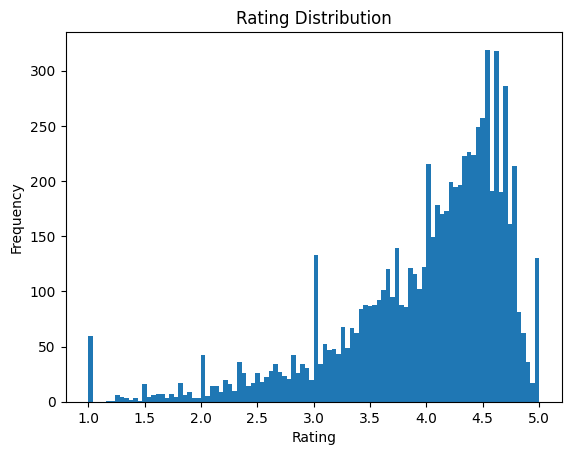

In [11]:
#4) Rating Distribution Analysis

plt.hist(df['rating'], bins=100)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Rating Distribution')
plt.show()


In [12]:
#5) Top 10 Categories by Installs
category_installs = df.groupby('category_en')['installs'].sum()

In [13]:
top_10_categories = category_installs.sort_values(ascending=False).head(10)
F' top 10 category is: {top_10_categories}'

' top 10 category is: category_en\nUtility                  89965400.0\nSocial                   73434100.0\nThrilling                52285400.0\nPhotography and Video    45413200.0\nArtistic                 43201800.0\nDriving                  30345900.0\nEntertainment            26869400.0\nSports                   24609800.0\nStrategy                 18772700.0\nEducational              17348900.0\nName: installs, dtype: float64'

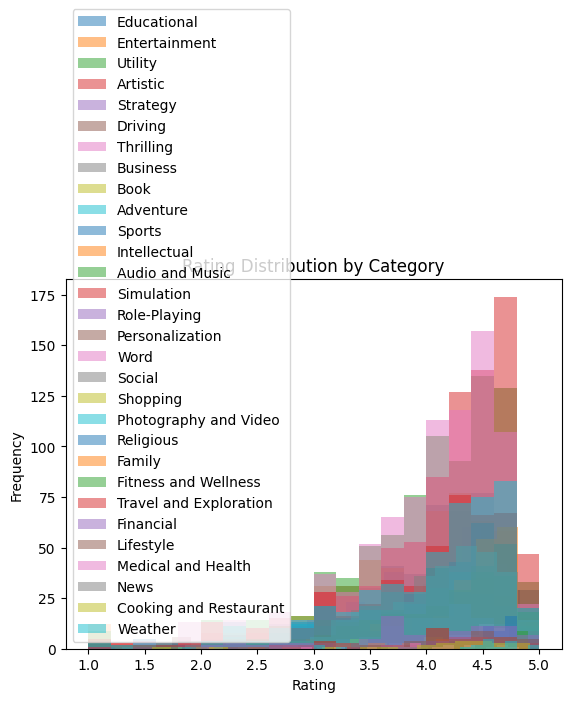

In [14]:
#6) Category-wise Rating Distribution Analysis
for category in df['category_en'].unique():
    category_df = df[df['category_en'] == category]
    plt.hist(category_df['rating'], bins=20, alpha=0.5, label=category)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Rating Distribution by Category')
plt.legend()
plt.show()


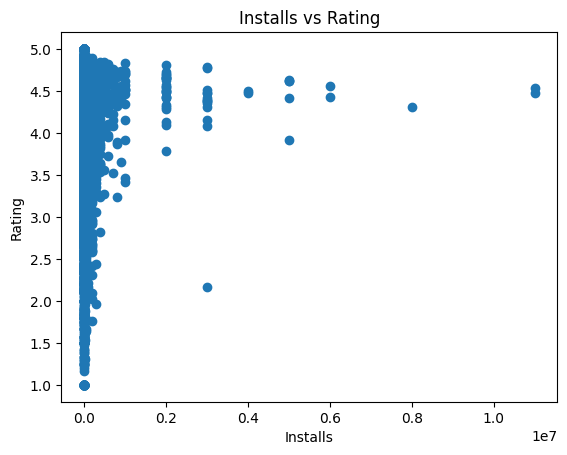

In [15]:
#7)  Installs vs Rating Analysis

plt.scatter(df['installs'], df['rating'])
plt.xlabel('Installs')
plt.ylabel('Rating')
plt.title('Installs vs Rating')
plt.show()

In [16]:
#8) Histograms
columns = ['app_name',	'installs',	'rating',	'rating_count',   'category_en']

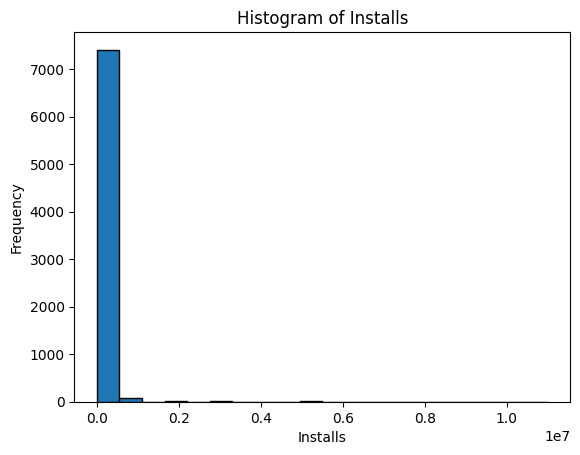

In [22]:
plt.hist(df['installs'], bins=20, edgecolor='black')
plt.title('Histogram of Installs')
plt.xlabel('Installs')
plt.ylabel('Frequency')
plt.show()